In [17]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

class Vasicek:
  def __init__(self, l, mu, sigma):
    self.l = l
    self.mu = mu
    self.sigma = sigma
    self.dt = 1.
    self.T = 100.
    self.n = self.T/self.dt

  def simulate(self, r0):
    np.random.seed(1)
    r = np.zeros(int(self.n)+1)
    i = 1
    r[0] = r0
    while i < self.n+1:
      r[i] = r[i-1] + l * (self.mu-r[i-1])*self.dt + self.sigma*np.sqrt(self.dt)*np.random.normal()
      i += 1
    return r


In [8]:
import pandas as pd

df = pd.read_excel("https://github.com/matteosan1/finance_course/raw/develop/libro/input_files/discount_factors_2022-10-05.xlsx")
df.head()

,months,dfs
0,0,1.000000
1,1,0.999296
2,2,0.998165
3,3,0.996618
4,4,0.995064


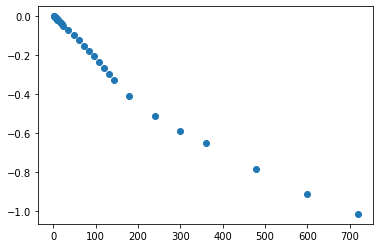

In [9]:
pillars = df.loc[1:, 'months']
rates = [np.log(d) for d in df.loc[1:, 'dfs']]

plt.scatter(pillars, rates)
plt.show()


In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


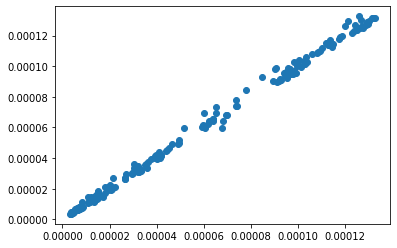

In [6]:
import yfinance as yf

proxy = yf.Ticker('^IRX')
data = proxy.history(start='2022-01-05')

data['Close'] = data['Close']/(250*100.)
data['prev'] = data['Close'].shift(1)
data.dropna(inplace=True)

plt.scatter(data['prev'], data['Close'])
plt.show()

In [19]:
import statsmodels.api as sm
from dateutil.relativedelta import relativedelta

X = data['prev']
X = sm.add_constant(X)
y = data['Close']

res = sm.OLS(y, X).fit()
print (res.summary())
l = (1 - res.params['prev'])
mu = res.params['const']/(1-res.params['prev'])
sigma2 = (np.var(res.resid))

print (l, mu*250, sigma2)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 5.695e+04
Date:                Sat, 08 Oct 2022   Prob (F-statistic):          2.42e-235
Time:                        21:02:27   Log-Likelihood:                 2188.0
No. Observations:                 190   AIC:                            -4372.
Df Residuals:                     188   BIC:                            -4365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.131e-07   2.91e-07      1.761      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


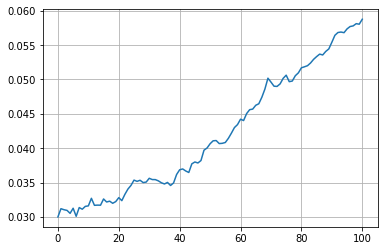

In [18]:
v = Vasicek(l, mu, np.sqrt(sigma2))
r = v.simulate(0.03/250)
plt.plot(r*250)
plt.grid(True)
plt.show()
